In [3]:
path="https://raw.githubusercontent.com/Ashutoshrx/Machine-Learning/master/Unsupervised/data/DLBCL_tab.csv"

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(path)
df.head()

,class,X02152_at,M14328_s_at,J03909_at,X56494_at,L17131_rna1_at,M57710_at,HG1980-HT2023_at,M63138_at,HG417-HT417_s_at,HG2279-HT2375_at,D82348_at,M22382_at,J04173_at,M20471_at,U28386_at,X62078_at,L33842_rna1_at,X12447_at,L02426_at,X17620_at,D79997_at,X16396_at,D55716_at,V00594_s_at,X17567_s_at,HG4074-HT4344_at,X67951_at,L19686_rna1_at,M25753_at,X15183_at,U29680_at,J02783_at,D43950_at,U14518_at,U12595_at,J04988_at,D45248_at,D13633_at,L25876_at,...,X80822_at,X99728_at,L23808_at,L08904_at,U79261_s_at,L25851_at,M97287_at,M33680_at,X04391_at,L32832_s_at,L38961_at,D63861_s_at,X52479_at,U02388_at,J03592_at,X16416_at,M37271_s_at,M13143_at,M12125_at,U79241_at,X51698_s_at,M31211_s_at,M18079_at,D87445_at,U06155_at,U03105_at,U06681_at,M17254_s_at,HG2059-HT2114_at,U79245_at,L41162_at,X12556_at,J03507_at,U16660_at,M15182_at,M69203_s_at,U36787_at,X05309_at,U43901_rna1_s_at,U46752_at
0,DLBCL,14742,12813,6921,7578,4413,9170,4351,5011,7502,8811,1494,5161,8286,3622,1206,1010,748,7208,2008,2998,433,2644,955,16672,5151,1338,7454,10942,527,10434,6697,685,926,373,287,8936,3338,546,1726,...,15369,513,788,374,-100,899,347,7656,188,230,104,281,465,-87,11766,356,313,171,281,32,-564,388,24,344,261,424,264,-654,554,-144,-316,-59,-69,893,422,455,620,221,22213,35
1,DLBCL,12641,13190,10405,11102,10383,11000,8607,13372,16768,9802,3449,5962,6669,9380,2624,3072,1571,13498,2567,2097,471,2132,1884,34276,6137,1024,10339,9756,351,10439,4079,5866,1251,192,848,13518,8448,234,399,...,15236,1015,723,1643,276,892,923,15798,73,566,327,250,326,-43,13566,262,346,147,1056,584,-171,1530,30,205,637,1335,363,-391,607,-93,-393,-102,-42,2286,1276,628,467,141,11285,-48
2,DLBCL,12730,13540,8512,11284,9152,10644,11118,11535,19206,8535,3889,8218,7782,11327,2752,5374,2883,9975,2416,2563,643,3177,1488,29945,7564,1267,13452,8599,665,11111,4142,3333,1780,429,601,11755,8250,839,1908,...,13187,910,2099,637,547,233,885,14020,117,269,271,596,213,-127,13373,666,1003,39,399,350,-396,177,-9,670,452,1443,1036,-720,901,-162,-671,-63,286,1924,1354,1349,563,226,19910,10
3,DLBCL,9872,17157,10594,9979,3800,7861,9791,10640,10944,5867,3380,6911,9196,8847,1095,2949,1446,8912,3737,3636,398,1275,1067,42653,5724,1007,7248,8998,341,7149,2106,3451,1402,172,634,9202,8591,370,279,...,8315,545,-29,610,549,271,892,15334,-11,75,240,184,242,-33,11785,676,533,23,815,117,-533,434,5,295,745,1140,317,-134,529,11,-535,-61,170,1011,1073,668,299,172,6135,107
4,DLBCL,18742,12063,824,4553,3905,3897,6162,2654,7238,5109,3890,16467,9711,8789,2492,1373,3065,4583,2226,3282,965,1628,1272,9772,3013,1201,3168,9563,611,20931,5521,1701,1626,487,424,9883,4365,564,914,...,17965,268,1666,449,745,1056,649,4502,339,214,362,613,212,-27,11570,426,139,228,1184,-29,-319,315,62,670,545,1807,130,-343,454,-104,-631,-57,132,956,1139,252,375,-3,20718,54


In [6]:
df.shape

(77, 1000)

In [22]:
df.isna().sum()

X02152_at           0
M14328_s_at         0
J03909_at           0
X56494_at           0
L17131_rna1_at      0
                   ..
HG2059-HT2114_at    0
L41162_at           0
J03507_at           0
X05309_at           0
U43901_rna1_s_at    0
Length: 513, dtype: int64

In [7]:
#finding higher correlated columns
def corelation(dataset,threshold):
  col_corr = set()
  corr_matrix= dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [8]:
corr_features= corelation(df,0.8)
#len(corr_features)
len(corr_features)

486

In [11]:
df=df.drop("class",axis=1)

In [9]:
df=df.drop(corr_features,axis=1)

In [12]:
df.shape

(77, 513)

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
import scipy.spatial.distance

In [19]:
#elbow method implementation

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
 
    distortions.append(sum(np.min(scipy.spatial.distance.cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(scipy.spatial.distance.cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [20]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 37850.18301726364
2 : 32469.983429457054
3 : 30390.089754104687
4 : 28987.63549502415
5 : 28245.850668324012
6 : 27294.654632754096
7 : 26626.498348127578
8 : 25879.659454057808
9 : 25048.87692883499


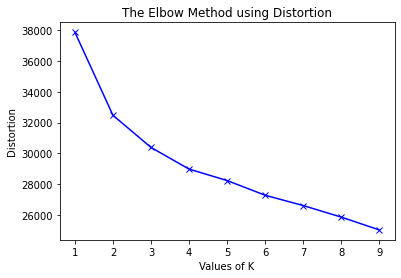

In [21]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

**K-Means**

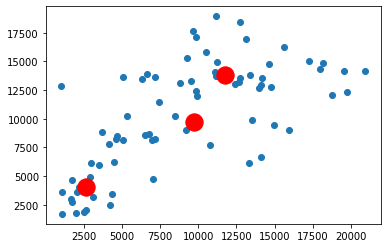

In [28]:
# Deploying K-means algorithm
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


**Ranking of features**

In [29]:
df.rank().head()

,X02152_at,M14328_s_at,J03909_at,X56494_at,L17131_rna1_at,M57710_at,HG1980-HT2023_at,M63138_at,D82348_at,M22382_at,L33842_rna1_at,X12447_at,X17620_at,X16396_at,V00594_s_at,X15183_at,U29680_at,J04988_at,D13633_at,X01060_at,X69433_at,D25328_at,Z21966_at,X03689_s_at,U81375_at,M16591_s_at,X16983_at,M86699_at,Z50115_s_at,D38048_at,M13792_at,HG4716-HT5158_at,D31887_at,X52851_rna1_at,M15205_at,K03515_at,U23143_at,D38553_at,M94856_at,M95623_cds1_at,...,X75308_at,X62466_at,M80335_at,X59711_at,S77583_at,D16217_at,K03183_f_at,U70862_at,AF007111_at,M82919_at,X98260_at,U65410_at,U32989_at,X80822_at,X99728_at,L23808_at,L08904_at,U79261_s_at,L25851_at,M97287_at,M33680_at,L32832_s_at,L38961_at,D63861_s_at,U02388_at,J03592_at,X16416_at,M37271_s_at,M13143_at,M12125_at,U79241_at,X51698_s_at,D87445_at,U03105_at,U06681_at,HG2059-HT2114_at,L41162_at,J03507_at,X05309_at,U43901_rna1_s_at
0,67.0,46.0,53.0,50.0,31.0,68.0,40.0,41.0,26.0,39.0,7.0,38.0,48.0,68.0,57.0,54.0,75.0,30.0,61.0,63.0,54.0,54.0,49.0,49.0,36.0,28.5,30.0,55.0,41.0,32.0,62.0,42.0,61.0,45.0,54.0,39.0,45.0,51.0,64.0,51.0,...,55.5,43.0,11.0,66.0,35.5,37.0,32.0,38.0,53.0,42.0,37.0,62.0,68.0,24.0,39.0,57.0,26.5,19.5,66.0,10.0,23.0,56.0,22.0,43.0,28.5,40.0,48.0,4.0,22.0,31.0,20.0,30.5,41.0,11.0,25.0,22.0,64.0,2.0,61.0,58.0
1,55.0,51.0,64.0,65.0,66.0,74.0,62.0,75.0,60.0,44.0,36.0,75.0,35.0,57.0,73.0,55.0,63.0,64.0,34.0,26.0,73.0,69.0,17.0,6.0,71.0,56.0,15.0,34.0,64.0,52.0,59.0,26.0,72.0,25.0,39.0,28.0,31.0,40.0,14.0,65.0,...,55.5,10.0,47.0,4.0,75.0,61.0,67.0,53.5,24.0,21.0,20.0,56.0,63.5,21.0,73.0,55.0,76.0,60.0,65.0,61.0,75.0,75.0,59.0,37.0,50.0,48.0,35.0,6.0,16.5,65.0,75.0,65.0,14.0,65.0,45.0,28.5,60.0,4.0,44.0,7.0
2,57.0,54.0,58.0,66.0,61.0,72.0,68.0,69.0,66.0,57.0,58.0,62.0,41.0,73.0,66.0,57.0,64.0,49.0,75.0,70.0,55.0,52.0,13.0,20.0,75.0,69.0,21.0,63.0,54.0,48.0,71.0,61.0,71.0,54.0,53.0,69.0,65.0,68.0,53.0,52.0,...,43.0,63.0,50.0,1.0,56.5,76.0,53.0,68.0,9.0,73.5,59.0,55.0,61.0,7.0,70.0,68.0,55.0,69.0,22.0,58.0,58.0,63.0,54.0,72.0,12.0,47.0,69.0,70.0,3.0,43.5,66.0,42.0,73.5,70.0,73.0,58.0,23.0,48.0,63.0,34.0
3,45.0,74.0,66.0,60.0,24.0,61.0,65.0,66.0,59.0,50.0,32.0,50.0,60.0,38.0,77.0,33.0,48.0,31.0,51.0,31.0,28.0,61.0,10.0,12.0,41.0,51.0,2.0,61.0,58.0,49.0,13.0,44.0,37.0,47.0,50.0,45.0,20.0,52.0,55.0,63.0,...,14.5,20.0,59.0,2.0,74.0,73.0,72.0,30.5,21.0,54.5,41.0,31.0,69.0,2.0,46.0,24.0,50.0,70.0,30.0,59.0,68.0,16.0,46.0,23.0,52.0,41.0,71.0,29.5,2.0,61.0,31.0,35.0,34.0,58.0,36.0,17.0,40.0,36.0,52.0,2.0
4,74.0,42.0,4.0,30.0,26.0,43.0,50.0,10.0,67.0,77.0,61.0,21.0,54.0,50.0,40.0,76.0,68.0,39.0,65.0,48.0,29.0,65.0,8.0,18.0,18.5,54.0,37.0,74.0,53.0,53.0,44.0,72.0,19.0,42.0,51.0,12.0,63.0,71.0,58.0,74.0,...,53.0,38.0,65.0,7.0,68.0,77.0,64.0,9.0,20.0,49.0,63.0,51.0,30.0,49.0,8.0,66.0,35.0,75.0,68.0,43.5,6.0,51.0,63.0,73.0,57.0,36.0,57.0,2.0,39.0,67.0,9.0,50.0,73.5,74.0,3.0,9.0,30.0,27.0,4.5,44.0
